In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22795


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22790,2021-05-10,47,沖縄県,36,13120,1,139
22791,2021-05-11,47,沖縄県,132,13252,0,139
22792,2021-05-12,47,沖縄県,109,13361,1,140
22793,2021-05-13,47,沖縄県,126,13487,0,140
22794,2021-05-14,47,沖縄県,134,13621,0,140


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10670,7265,130
43,香川県,17945,1742,24
44,高知県,18915,1144,20
45,鳥取県,15035,425,2
46,鹿児島県,22310,2808,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22788,2021-05-08,47,沖縄県,93,12981,0,138,424.0
22789,2021-05-09,47,沖縄県,103,13084,0,138,470.0
22790,2021-05-10,47,沖縄県,36,13120,1,139,449.0
22791,2021-05-11,47,沖縄県,132,13252,0,139,548.0
22792,2021-05-12,47,沖縄県,109,13361,1,140,594.0
22793,2021-05-13,47,沖縄県,126,13487,0,140,681.0
22794,2021-05-14,47,沖縄県,134,13621,0,140,733.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
484,北海道,3573.0
969,青森県,201.0
1454,岩手県,119.0
1939,宮城県,230.0
2424,秋田県,111.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11640,4361,96,317.0
1,京都府,12610,14397,196,959.0
2,佐賀県,19885,2169,15,334.0
3,兵庫県,13580,36985,848,2636.0
4,北海道,485,29345,927,3573.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11640,4361,96,317.0,1813859
1,京都府,12610,14397,196,959.0,2545899
2,佐賀県,19885,2169,15,334.0,823810
3,兵庫県,13580,36985,848,2636.0,5549568
4,北海道,485,29345,927,3573.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,485,29345,927,3573.0,5267762,55.706769,557.067688,67.827666
41,青森県,970,1926,27,201.0,1275783,15.096611,150.966113,15.755030
19,岩手県,1455,1178,39,119.0,1235517,9.534470,95.344702,9.631596
11,宮城県,1940,8490,75,230.0,2292385,37.035664,370.356637,10.033219
36,秋田県,2425,669,9,111.0,985416,6.789011,67.890109,11.264278
15,山形県,2910,1681,37,98.0,1082296,15.531795,155.317954,9.054824
35,福島県,3395,4154,130,437.0,1881981,22.072486,220.724864,23.220213
38,茨城県,3880,8884,137,425.0,2921436,30.409703,304.097026,14.547640
27,栃木県,4365,5782,74,262.0,1965516,29.417212,294.172116,13.329833
37,群馬県,4850,7086,111,583.0,1969439,35.979789,359.797892,29.602339


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14257.212766
std       27136.760884
min         414.000000
25%        2047.500000
50%        4271.000000
75%        8687.000000
max      150925.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6305,150925,1940,6484.0,13834925,109.089858,1090.898577,46.866897
1,大阪府,13095,93370,1901,5721.0,8849635,105.507176,1055.071763,64.646734
2,神奈川県,6790,57248,854,2151.0,9209442,62.162290,621.622895,23.356464
3,埼玉県,5335,41091,758,1802.0,7390054,55.603112,556.031120,24.384125
4,愛知県,11155,39654,666,3950.0,7575530,52.344852,523.448524,52.141566
5,兵庫県,13580,36985,848,2636.0,5549568,66.644827,666.448271,47.499193
6,千葉県,5820,35196,653,1125.0,6319772,55.691883,556.918826,17.801275
7,北海道,485,29345,927,3573.0,5267762,55.706769,557.067688,67.827666
8,福岡県,19400,29216,384,3432.0,5129841,56.953032,569.530323,66.902658
9,京都府,12610,14397,196,959.0,2545899,56.549769,565.497689,37.668423


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      33.346597
std       24.263926
min        6.094294
25%       17.142657
50%       25.716316
75%       44.690258
max      109.089858
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,485,29345,927,3573.0,5267762,55.706769,557.067688,67.827666
34,福岡県,19400,29216,384,3432.0,5129841,56.953032,569.530323,66.902658
9,大阪府,13095,93370,1901,5721.0,8849635,105.507176,1055.071763,64.646734
18,岡山県,16005,5780,68,1133.0,1903627,30.363091,303.630911,59.517962
24,愛知県,11155,39654,666,3950.0,7575530,52.344852,523.448524,52.141566
28,沖縄県,22795,13621,140,733.0,1481547,91.937684,919.376841,49.475312
21,広島県,16490,7946,112,1365.0,2826858,28.108946,281.089464,48.286826
3,兵庫県,13580,36985,848,2636.0,5549568,66.644827,666.448271,47.499193
8,大分県,21340,2768,32,544.0,1151229,24.043870,240.438696,47.253848
26,東京都,6305,150925,1940,6484.0,13834925,109.089858,1090.898577,46.866897


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


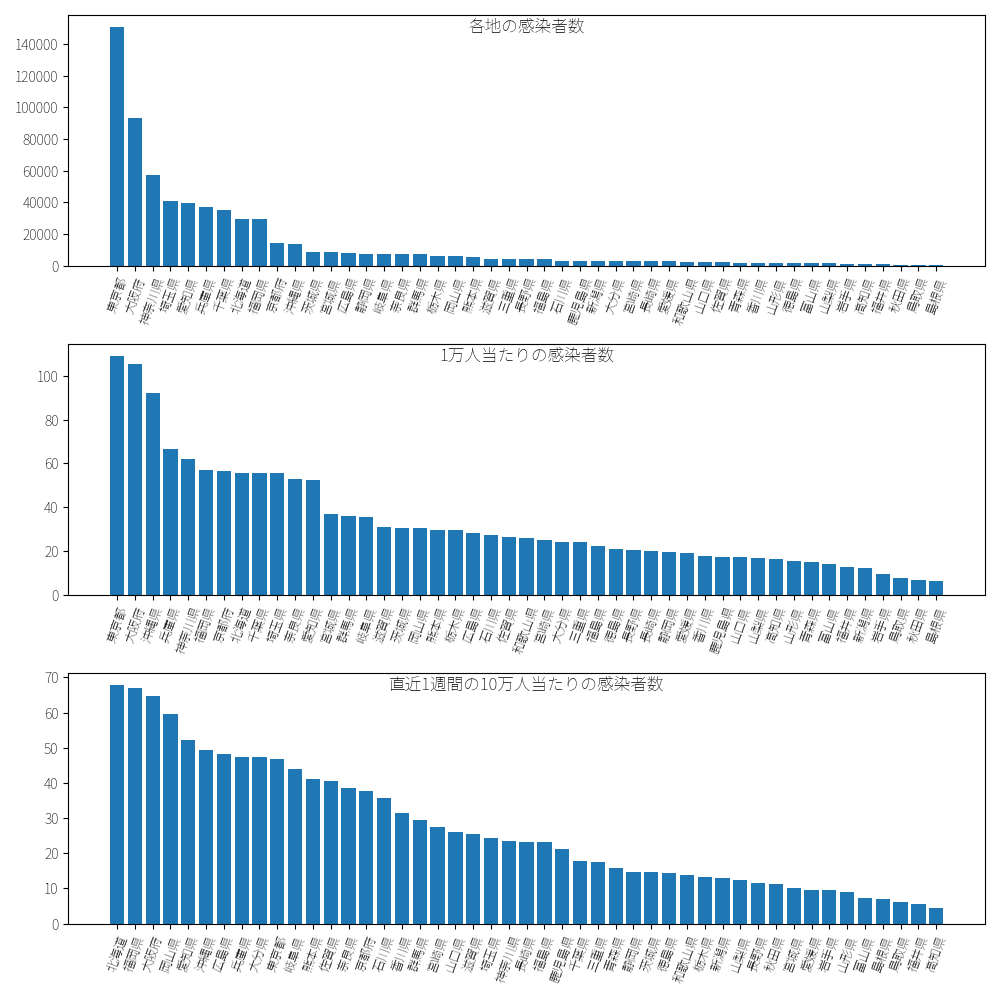

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   414.     19227.875  38041.75   56855.625  75669.5    94483.375
 113297.25  132111.125 150925.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


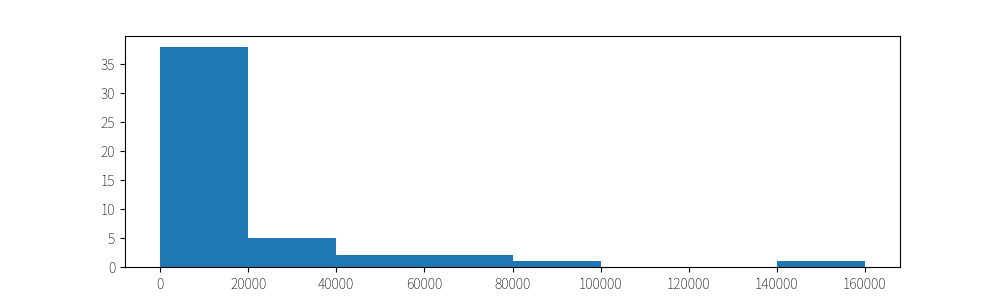

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


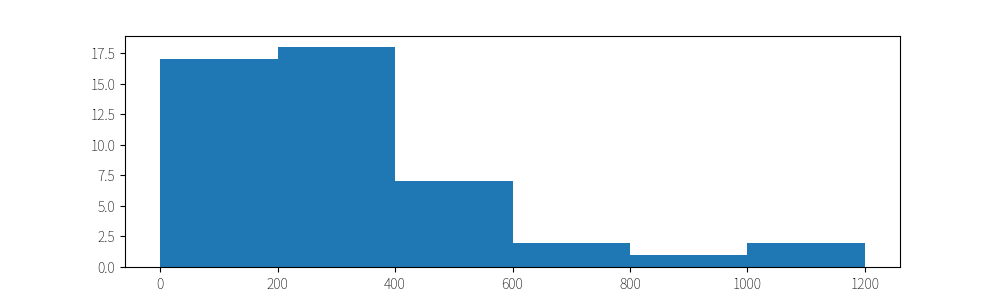

(array([17., 18.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
